In [1]:
print('hello')

hello


In [3]:
import cv2
print(cv2.__version__)

4.1.2


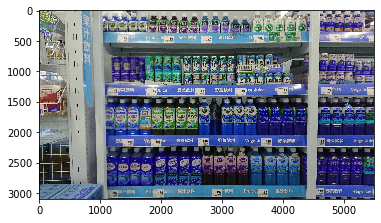

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('./images/1-1.jpg')
plt.imshow(img)

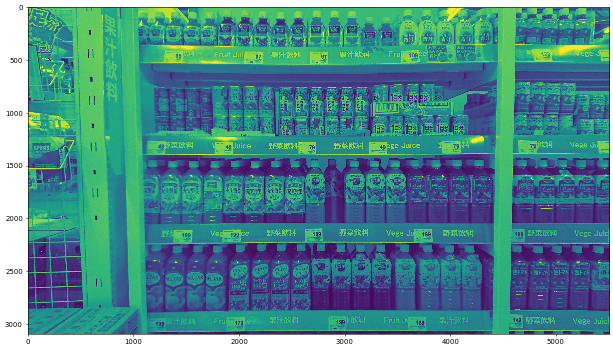

In [42]:
plt.figure(figsize=(15, 15), dpi=50)
gray1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
plt.imshow(gray1)

In [12]:
akaze = cv2.AKAZE_create() 
kp1, des1 = akaze.detectAndCompute(gray1,None) 


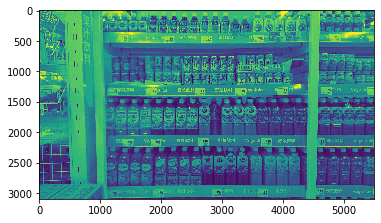

In [17]:
img11 = cv2.imread('./images/1-1.jpg')
gray1 = cv2.cvtColor(img11,cv2.COLOR_BGR2GRAY) 
plt.imshow(gray1)


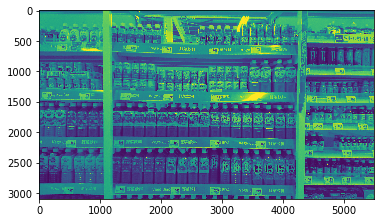

In [20]:
img21 = cv2.imread('./images/2-1.jpg')
gray2 = cv2.cvtColor(img21,cv2.COLOR_BGR2GRAY) 
plt.imshow(gray2)

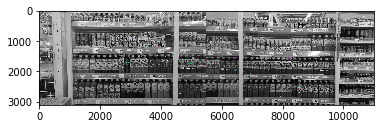

In [22]:
# AKAZE検出器の生成
akaze = cv2.AKAZE_create() 
# gray1にAKAZEを適用、特徴点を検出
kp1, des1 = akaze.detectAndCompute(gray1,None) 
# gray2にAKAZEを適用、特徴点を検出
kp2, des2 = akaze.detectAndCompute(gray2,None) 
# BFMatcherオブジェクトの生成
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptorsを生成
matches = bf.match(des1, des2)
# matchesをdescriptorsのdistance順(似ている順)にsortする 
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv2.drawMatches(gray1, kp1, gray2, kp2, matches[:10], None, flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img3)

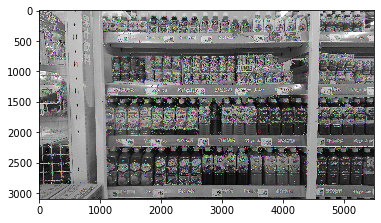

In [25]:
# AKAZE検出器の生成
akaze = cv2.AKAZE_create() 
# gray1にAKAZEを適用、特徴点を検出
kp1, des1 = akaze.detectAndCompute(gray1,None) 
img1_sift = cv2.drawKeypoints(gray1, kp1, None, flags=4)
plt.imshow(img1_sift)

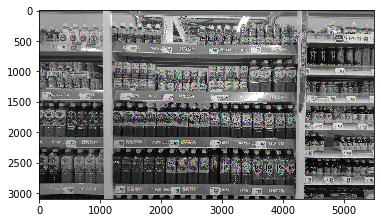

In [31]:
kp1, des1 = akaze.detectAndCompute(gray2,None) 
img2_sift = cv2.drawKeypoints(gray2, kp1, None, flags=0)
plt.imshow(img2_sift)

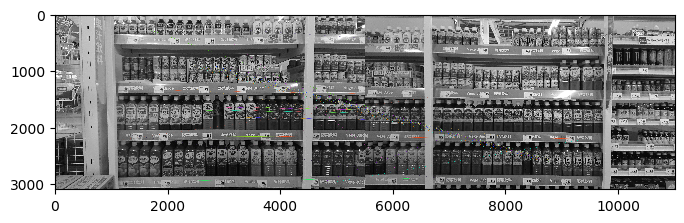

In [62]:
plt.figure(figsize=(8, 8), dpi=600)
img31 = cv2.imread('./images/1-1.jpg')
gray1 = cv2.cvtColor(img31,cv2.COLOR_BGR2GRAY) 
img32 = cv2.imread('./images/2-1.jpg')
gray2 = cv2.cvtColor(img32,cv2.COLOR_BGR2GRAY) 

akaze = cv2.AKAZE_create() # AKAZE検出器の生成
kp1, des1 = akaze.detectAndCompute(gray1,None) # 特徴量の検出と特徴量ベクトルの計算
kp2, des2 = akaze.detectAndCompute(gray2,None) 

bf = cv2.BFMatcher()    # BFMatcherオブジェクトの生成

matches = bf.knnMatch(des1, des2, k=2)  # Match descriptorsを生成
# matches = bf.match(des1, des2)
ratio = 0.5
good = []
for m, n in matches:
    if m.distance < ratio * n.distance:
        good.append([m])

# 対応する特徴点同士を描画
img3 = cv2.drawMatchesKnn(gray1, kp1, gray2, kp2, good[:50], None, flags=2)

plt.imshow(img3)

In [68]:
img1 = cv2.imread('./images/1-1_.jpg')
img2 = cv2.imread('./images/2-1_.jpg')
stitcher = cv2.Stitcher.create(0)
result = stitcher.stitch((img1,img2))
#cv2.imwrite('result.jpg', result[1])

